This jupyter-notebook has be created with 'jupytext'.

Use this [Link](https://colab.research.google.com/github/magnumnp/magnumnp_demos/blob/main/sot.ipynb) to directly open the Notebook in Google Colab.

## Install magnum.np and fetch reference data (required for Colab)

In [1]:
!pip install -q triton magnumnp
from os import path
if not path.isdir("ref"):
    !mkdir ref
    !wget -P ref https://gitlab.com/magnum.np/magnum.np/raw/main/demos/sot/ref/m.dat &> /dev/null

# SOT demo

## Run Simulation

In [2]:
from magnumnp import *
import torch
import pathlib
from tqdm import tqdm

set_log_level(25) # show info_green, but hide info_blue
Timer.enable()
try:
    this_dir = pathlib.Path(__file__).resolve().parent
except:
    this_dir = pathlib.Path().resolve()

# initialize state
dt = 1e-12
n  = (1, 1, 1)
dx = (1.0e-9, 1.0e-9, 1e-9)
mesh = Mesh(n, dx)
state = State(mesh)

# initialize polarization, p, and charge current amplitude
# thickness of thin film on which the SOT acts
p = torch.tensor([0.,-1.,0.])
je = 6.9e10
d = n[2] * dx[2]
Keff = 1200e3*constants.mu_0*0.4/2./constants.mu_0

state.material = {
    "Ms": 1200e3,
    "A": 15e-12,
    "Ku": Keff,
    "Ku_axis": [0., 0., 1.],
    "gamma": 2.211e5,
    "alpha": 0.048,
    "eta_damp": -0.1, # both eta with opposite sign as magnum.af, same as magnum.pi
    "eta_field": 0.3,
    "p": p,
    "d": d,
    "je": je}

# initialize field terms
exchange = ExchangeField()
aniso = UniaxialAnisotropyField()
torque = SpinOrbitTorque()

# initialize magnetization that relaxes into s-state
state.m = state.Constant([0.,0.,1.])

# relax without external field
minimizer = MinimizerBB([exchange, aniso])
minimizer.minimize(state)

# perform integration with external field
state.t = 0.
llg = LLGSolver([exchange, torque, aniso])
logger = Logger(this_dir / "data", ['t', 'm', torque.h])

for i in tqdm(torch.arange(0, 1e-9, dt)):
    llg.step(state, dt)
    logger << state

Timer.print_report()

2025-08-19 07:47:19  magnum.np:INFO magnum.np 2.0.3 (/usr/local/lib/python3.10/site-packages/ipykernel_launcher.py -f /tmp/tmpyqbgsfu5.json --HistoryManager.hist_file=:memory:)


2025-08-19 07:47:19  magnum.np:INFO [State] running on device: cpu (dtype = float64)


2025-08-19 07:47:19  magnum.np:INFO [Mesh] 1x1x1 (dx= 1e-09 x 1e-09 x 1e-09)


2025-08-19 07:47:26  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2025-08-19 07:47:26  magnum.np:INFO [LLGSolver] using RKF45 solver (atol = 1e-05)


  0%|          | 0/1001 [00:00<?, ?it/s]

  0%|          | 1/1001 [00:01<19:15,  1.16s/it]

  2%|▏         | 17/1001 [00:01<00:53, 18.28it/s]

  3%|▎         | 32/1001 [00:01<00:26, 36.08it/s]

  5%|▍         | 48/1001 [00:01<00:17, 55.80it/s]

  6%|▋         | 64/1001 [00:01<00:12, 74.69it/s]

  8%|▊         | 80/1001 [00:01<00:10, 91.92it/s]

 10%|▉         | 96/1001 [00:01<00:08, 106.64it/s]

 11%|█         | 111/1001 [00:01<00:07, 116.87it/s]

 13%|█▎        | 127/1001 [00:01<00:06, 126.16it/s]

 14%|█▍        | 143/1001 [00:02<00:06, 134.59it/s]

 16%|█▌        | 160/1001 [00:02<00:05, 142.49it/s]

 18%|█▊        | 176/1001 [00:02<00:05, 147.01it/s]

 19%|█▉        | 192/1001 [00:02<00:05, 145.98it/s]

 21%|██        | 208/1001 [00:02<00:05, 147.51it/s]

 22%|██▏       | 224/1001 [00:02<00:05, 148.56it/s]

 24%|██▍       | 240/1001 [00:02<00:05, 150.64it/s]

 26%|██▌       | 256/1001 [00:02<00:04, 150.61it/s]

 27%|██▋       | 272/1001 [00:02<00:04, 151.57it/s]

 29%|██▉       | 288/1001 [00:03<00:04, 151.29it/s]

 30%|███       | 304/1001 [00:03<00:04, 152.27it/s]

 32%|███▏      | 320/1001 [00:03<00:04, 152.15it/s]

 34%|███▎      | 336/1001 [00:03<00:04, 154.15it/s]

 35%|███▌      | 353/1001 [00:03<00:04, 156.08it/s]

 37%|███▋      | 369/1001 [00:03<00:04, 156.53it/s]

 38%|███▊      | 385/1001 [00:03<00:03, 156.00it/s]

 40%|████      | 401/1001 [00:03<00:03, 155.59it/s]

 42%|████▏     | 417/1001 [00:03<00:03, 154.39it/s]

 43%|████▎     | 433/1001 [00:03<00:03, 154.52it/s]

 45%|████▍     | 449/1001 [00:04<00:03, 155.34it/s]

 46%|████▋     | 465/1001 [00:04<00:03, 156.02it/s]

 48%|████▊     | 481/1001 [00:04<00:03, 154.76it/s]

 50%|████▉     | 497/1001 [00:04<00:03, 153.95it/s]

 51%|█████     | 513/1001 [00:04<00:03, 151.69it/s]

 53%|█████▎    | 529/1001 [00:04<00:03, 151.44it/s]

 54%|█████▍    | 545/1001 [00:04<00:02, 153.13it/s]

 56%|█████▌    | 561/1001 [00:04<00:02, 151.79it/s]

 58%|█████▊    | 577/1001 [00:04<00:02, 148.35it/s]

 59%|█████▉    | 592/1001 [00:05<00:02, 146.64it/s]

 61%|██████    | 607/1001 [00:05<00:02, 146.17it/s]

 62%|██████▏   | 623/1001 [00:05<00:02, 148.30it/s]

 64%|██████▍   | 639/1001 [00:05<00:02, 150.23it/s]

 65%|██████▌   | 655/1001 [00:05<00:02, 152.52it/s]

 67%|██████▋   | 671/1001 [00:05<00:02, 151.12it/s]

 69%|██████▊   | 687/1001 [00:05<00:02, 150.15it/s]

 70%|███████   | 703/1001 [00:05<00:01, 150.07it/s]

 72%|███████▏  | 719/1001 [00:05<00:01, 149.67it/s]

 73%|███████▎  | 735/1001 [00:05<00:01, 150.06it/s]

 75%|███████▌  | 751/1001 [00:06<00:01, 149.14it/s]

 77%|███████▋  | 767/1001 [00:06<00:01, 150.55it/s]

 78%|███████▊  | 783/1001 [00:06<00:01, 150.75it/s]

 80%|███████▉  | 799/1001 [00:06<00:01, 152.52it/s]

 81%|████████▏ | 815/1001 [00:06<00:01, 152.12it/s]

 83%|████████▎ | 831/1001 [00:06<00:01, 152.41it/s]

 85%|████████▍ | 847/1001 [00:06<00:01, 152.95it/s]

 86%|████████▌ | 863/1001 [00:06<00:00, 153.08it/s]

 88%|████████▊ | 879/1001 [00:06<00:00, 152.43it/s]

 89%|████████▉ | 895/1001 [00:07<00:00, 151.05it/s]

 91%|█████████ | 911/1001 [00:07<00:00, 151.41it/s]

 93%|█████████▎| 927/1001 [00:07<00:00, 150.58it/s]

 94%|█████████▍| 943/1001 [00:07<00:00, 149.36it/s]

 96%|█████████▌| 958/1001 [00:07<00:00, 148.13it/s]

 97%|█████████▋| 973/1001 [00:07<00:00, 146.95it/s]

 99%|█████████▉| 989/1001 [00:07<00:00, 148.86it/s]

100%|██████████| 1001/1001 [00:07<00:00, 129.40it/s]


2025-08-19 07:47:34  magnum.np: ===============================================================================


2025-08-19 07:47:34  magnum.np: TIMER REPORT


2025-08-19 07:47:34  magnum.np: ===============================================================================


2025-08-19 07:47:34  magnum.np: Operation                        No of calls    Avg time [ms]    Total time [s]


2025-08-19 07:47:34  magnum.np: -----------------------------  -------------  ---------------  ----------------


2025-08-19 07:47:34  magnum.np: MinimizerBB.minimize                       1     6869.97              6.86997


2025-08-19 07:47:34  magnum.np:     ExchangeField.h                        2     3047.5               6.09501


2025-08-19 07:47:34  magnum.np:     UniaxialAnisotropyField.h              2      386.682             0.773365


2025-08-19 07:47:34  magnum.np: LLGSolver.step                          1001        6.03252           6.03855


2025-08-19 07:47:34  magnum.np:     ExchangeField.h                    12030        0.0791952         0.952718


2025-08-19 07:47:34  magnum.np:     SpinOrbitTorque.h                  12030        0.156174          1.87877


2025-08-19 07:47:34  magnum.np:     UniaxialAnisotropyField.h          12030        0.0552799         0.665017


2025-08-19 07:47:34  magnum.np: SpinOrbitTorque.h                       1001        0.0870206         0.0871076


2025-08-19 07:47:34  magnum.np: -----------------------------  -------------  ---------------  ----------------


2025-08-19 07:47:34  magnum.np: Total                                                                14.6143


2025-08-19 07:47:34  magnum.np: Missing                                                               1.61869


2025-08-19 07:47:34  magnum.np: ===============================================================================


## Plot Results

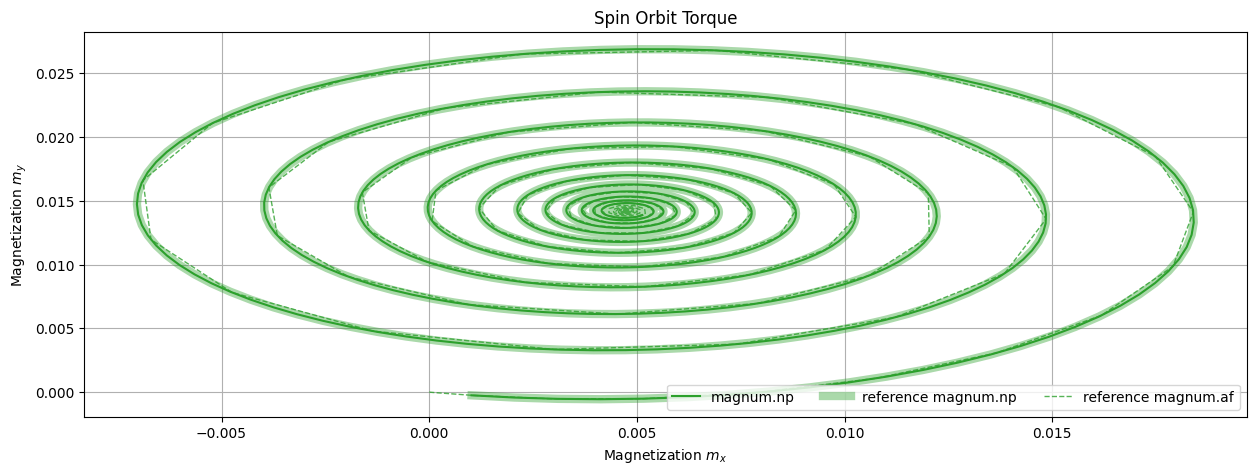

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("data/log.dat")
ref_np = np.loadtxt("ref/ref_magnumnp.dat")
ref_af = np.loadtxt("ref/ref_magnumaf.dat")

fig, ax = plt.subplots(figsize=(15,5))
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.plot(data[:,1], data[:,2], '-', color = cycle[2], label = "magnum.np")
ax.plot(ref_np[:,1], ref_np[:,2], '-', color = cycle[2], linewidth = 6, alpha = 0.4, label = "reference magnum.np")
ax.plot(ref_af[:,1], ref_af[:,2], '--', color = cycle[2], linewidth = 1, alpha = 0.8, label = "reference magnum.af")

ax.set_title("Spin Orbit Torque")
ax.set_xlabel("Magnetization $m_x$")
ax.set_ylabel("Magnetization $m_y$")
ax.legend(ncol=3)
ax.grid()
fig.savefig("data/results.png")